<a href="https://colab.research.google.com/github/sukin2004/data-analyst/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/content/startup_funding.csv')

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'date_dd/mm/yyyy': 'date'}, inplace=True)
df.rename(columns={
    'city__location': 'city_location',
    'investmentntype': 'investment_type'
}, inplace=True)


In [8]:
df



,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [9]:
df.columns


Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investment_type', 'amount_in_usd',
       'remarks'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
sr_no,0
date,0
startup_name,0
industry_vertical,171
subvertical,936
city_location,180
investors_name,24
investment_type,4
amount_in_usd,960
remarks,2625


In [11]:

df.fillna('Unknown', inplace=True)


In [12]:
df

,sr_no,date,startup_name,industry_vertical,subvertical,city_location,investors_name,investment_type,amount_in_usd,remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",Unknown
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",Unknown
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",Unknown
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",Unknown
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",Unknown
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,Unknown,Unknown,Unknown,Asia Pacific Internet Group,Private Equity,"45,00,000",Unknown
3040,3041,29/01/2015,Graphene,Unknown,Unknown,Unknown,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,Unknown,Unknown,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",Unknown
3042,3043,30/01/2015,Simplotel,Unknown,Unknown,Unknown,MakeMyTrip,Private Equity,Unknown,"Strategic Funding, Minority stake"


In [13]:
df['startup_name'][df['startup_name'].duplicated()].unique().size


393

In [14]:
df[df == 'Unknown'].count()


,0
sr_no,0
date,0
startup_name,0
industry_vertical,171
subvertical,936
city_location,180
investors_name,24
investment_type,4
amount_in_usd,960
remarks,2625


In [16]:
def decode_text(val):
    try:
        if isinstance(val, str):
            return val.encode('utf-8').decode('unicode_escape').replace('\xa0', '').strip()
        return val
    except:
        return val

# Check correct column names
print(df.columns)

# Apply only if the columns exist
if 'city_location' in df.columns:
    df['city_location'] = df['city_location'].apply(decode_text)

if 'amount_in_usd' in df.columns:
    df['amount_in_usd'] = df['amount_in_usd'].apply(decode_text)


Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investment_type', 'amount_in_usd',
       'remarks'],
      dtype='object')


In [20]:
# Remove commas and convert to numeric
df['amount_in_usd'] = df['amount_in_usd'].replace(',', '', regex=True)
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')


In [22]:
# Group and get top 10 cities by investment
top_10_cities = (
    df.groupby('city_location')['amount_in_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top_10_cities)

  city_location  amount_in_usd
0     Bangalore   1.136159e+10
1     Bengaluru   7.112921e+09
2        Mumbai   4.921185e+09
3     New Delhi   3.017817e+09
4       Gurgaon   3.005296e+09
5       Unknown   1.271864e+09
6         Noida   1.262864e+09
7      Gurugram   8.659325e+08
8       Chennai   7.187670e+08
9          Pune   6.330820e+08


In [23]:
def decode_text(val):
    if isinstance(val, str):
        try:
            return val.encode('utf-8').decode('unicode_escape').replace('\xa0', '').strip()
        except:
            return val
    return val


In [25]:
df['city_location']
df['amount_in_usd']
df['industry_vertical']


,industry_vertical
0,E-Tech
1,Transportation
2,E-commerce
3,FinTech
4,Fashion and Apparel
...,...
3039,Unknown
3040,Unknown
3041,Unknown
3042,Unknown


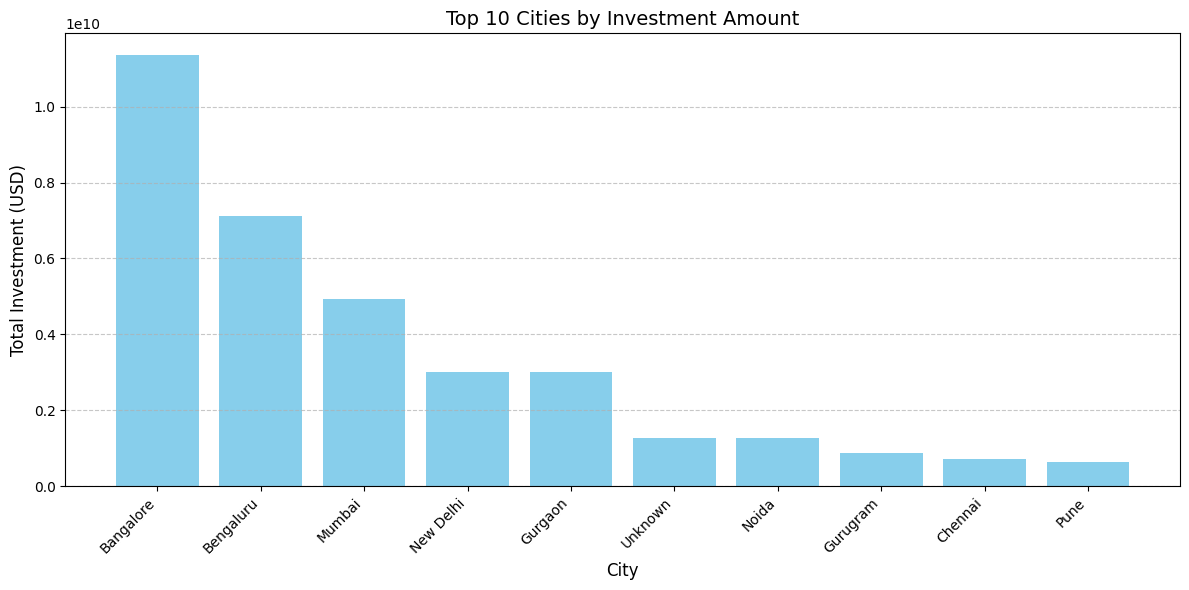

In [27]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['city_location'], top_10_cities['amount_in_usd'], color='skyblue')

# Add labels and title
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Investment (USD)", fontsize=12)
plt.title("Top 10 Cities by Investment Amount", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate city names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


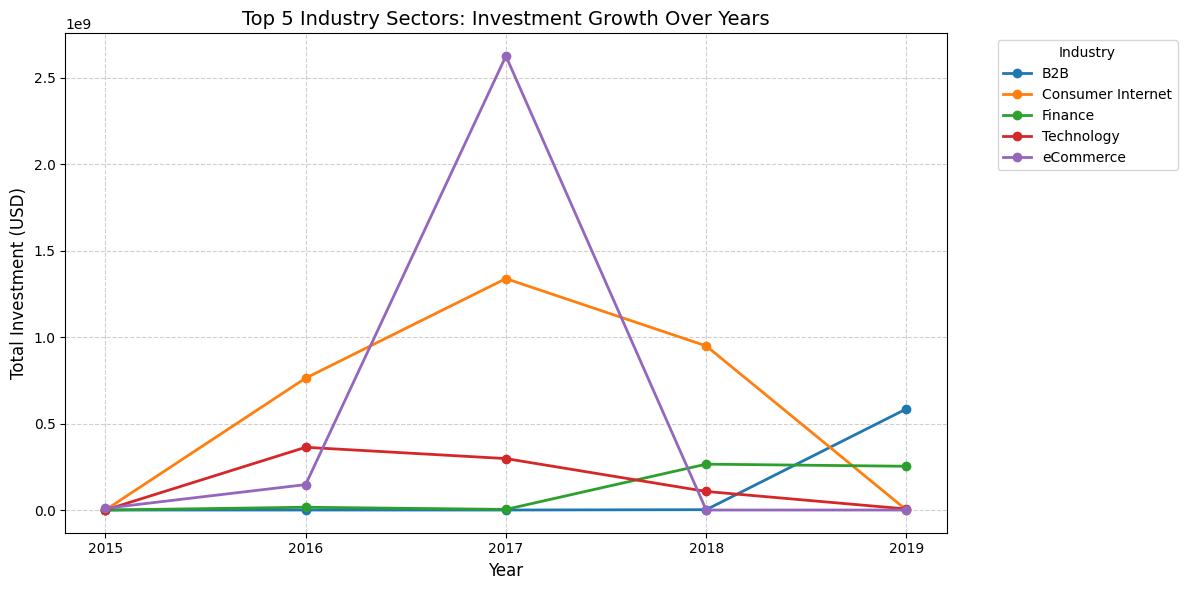

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Group by year and industry
grouped = df.groupby(['year', 'industry_vertical'])['amount_in_usd'].sum().reset_index()

# Select top 5 sectors overall
top_sectors = grouped.groupby('industry_vertical')['amount_in_usd'].sum().nlargest(5).index
filtered = grouped[grouped['industry_vertical'].isin(top_sectors)]

# Pivot for plotting
pivot_data = filtered.pivot(index='year', columns='industry_vertical', values='amount_in_usd').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
for sector in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[sector], marker='o', linewidth=2, label=sector)

plt.title('Top 5 Industry Sectors: Investment Growth Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Investment (USD)', fontsize=12)
plt.xticks(pivot_data.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
# Split multiple investors in a single entry
investor_series = df['investors_name'].dropna().str.split(',')

# Flatten the list of investors
all_investors = investor_series.explode().str.strip()

# Count frequency of each investor
investor_counts = all_investors.value_counts().reset_index()
investor_counts.columns = ['investor_name', 'frequency']

# Show top 10 investors
top_10_investors = investor_counts.head(10)
print(top_10_investors)


           investor_name  frequency
0        Sequoia Capital         72
1         Accel Partners         68
2                                58
3        Kalaari Capital         50
4         Blume Ventures         47
5          SAIF Partners         47
6   Indian Angel Network         41
7  Undisclosed Investors         39
8  Undisclosed investors         31
9             Ratan Tata         31


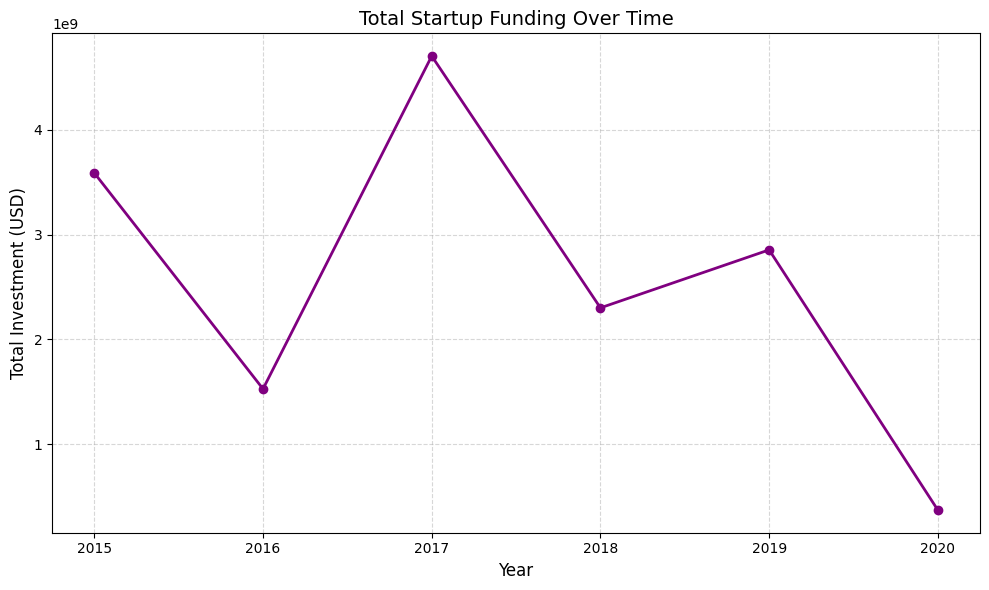

In [30]:
import matplotlib.pyplot as plt

# Step 1: Ensure date column is datetime and extract year
df['year'] = df['date'].dt.year

# Step 2: Group by year and sum the amount
funding_over_time = (
    df.groupby('year')['amount_in_usd']
    .sum()
    .reset_index()
    .sort_values('year')
)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(funding_over_time['year'], funding_over_time['amount_in_usd'], marker='o', color='purple', linewidth=2)
plt.title('Total Startup Funding Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Investment (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(funding_over_time['year'])
plt.tight_layout()
plt.show()


In [31]:
df['amount_in_usd']

,amount_in_usd
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0
...,...
3039,4500000.0
3040,825000.0
3041,1500000.0
3042,NaN


In [32]:
df['industry_vertical']

,industry_vertical
0,E-Tech
1,Transportation
2,E-commerce
3,FinTech
4,Fashion and Apparel
...,...
3039,Unknown
3040,Unknown
3041,Unknown
3042,Unknown
